<ipython-input-1-20ec848fd4dc>:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Monthly_Trend'] = df['Price'].resample('M').mean().resample('D').interpolate()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress thi

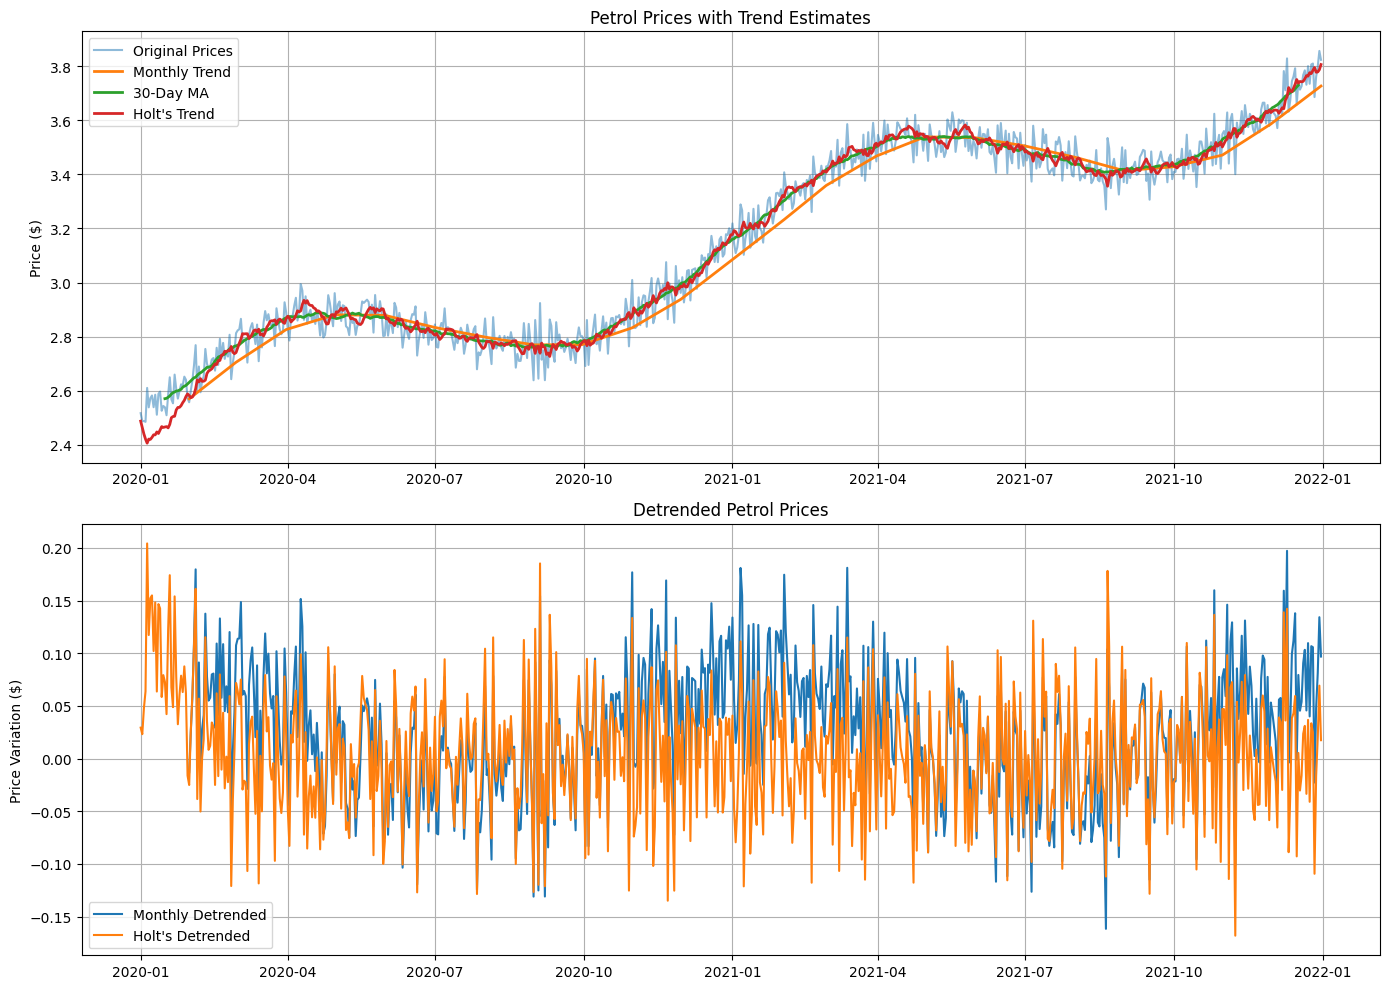

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

## 1. Create Sample Data (Replace with your actual data)
dates = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')
trend = np.linspace(2.5, 3.8, len(dates))  # Increasing trend
seasonality = 0.2 * np.sin(np.arange(len(dates)) * (2 * np.pi / 365))  # Yearly pattern
noise = np.random.normal(0, 0.05, len(dates))
prices = trend + seasonality + noise

df = pd.DataFrame({'Date': dates, 'Price': prices})
df.set_index('Date', inplace=True)

## 2. Trend Estimation Methods
# Monthly Aggregation
df['Monthly_Trend'] = df['Price'].resample('M').mean().resample('D').interpolate()

# 30-Day Moving Average
df['30Day_MA'] = df['Price'].rolling(window=30, center=True).mean()

# Exponential Smoothing
model = SimpleExpSmoothing(df['Price']).fit(smoothing_level=0.1)
df['Exp_Smooth'] = model.fittedvalues

# Holt's Linear Trend
holt_model = Holt(df['Price']).fit(smoothing_level=0.2, smoothing_trend=0.05)
df['Holts_Trend'] = holt_model.fittedvalues

## 3. Detrending (Remove Trend)
df['Monthly_Detrended'] = df['Price'] - df['Monthly_Trend']
df['30Day_Detrended'] = df['Price'] - df['30Day_MA']
df['Exp_Detrended'] = df['Price'] - df['Exp_Smooth']
df['Holts_Detrended'] = df['Price'] - df['Holts_Trend']

## 4. Plot Results
plt.figure(figsize=(14, 10))

# Original vs Trend Estimates
plt.subplot(2, 1, 1)
plt.plot(df['Price'], label='Original Prices', alpha=0.5)
plt.plot(df['Monthly_Trend'], label='Monthly Trend', linewidth=2)
plt.plot(df['30Day_MA'], label='30-Day MA', linewidth=2)
plt.plot(df['Holts_Trend'], label="Holt's Trend", linewidth=2)
plt.title('Petrol Prices with Trend Estimates')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)

# Detrended Series
plt.subplot(2, 1, 2)
plt.plot(df['Monthly_Detrended'], label='Monthly Detrended')
plt.plot(df['Holts_Detrended'], label="Holt's Detrended")
plt.title('Detrended Petrol Prices')
plt.ylabel('Price Variation ($)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Save Results (Optional)
df.to_csv('petrol_price_trend_analysis.csv')